In [1]:
# Import modules 
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
import pandas as pd 
import geopandas as gpd
# import PIL
# import io

# Set the color palette 
# cmap = colors.LinearSegmentedColormap.from_list("Custom", ['#e3eeee'] + ['#370732'], N=6)

In [2]:
# make the ground map 
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

In [3]:
ESPON2 = gpd.read_file('../Output/ESPON2.shp')

In [4]:
pwd

'C:\\Users\\mhachaichi\\Documents\\ESPON_Project\\Analysis\\Code'

In [5]:
!cd ..
!pwd

/c/Users/mhachaichi/Documents/ESPON_Project/Analysis/Code


In [18]:
# Read data 
# covid = gpd.read_file('../Output/shape.shp')
data_two = pd.read_csv('../Output/Normal_deaths.csv')
data_two

normal_death = covid.merge(data_two, on = "NUTS_ID")
# Trun all the data frame into int values
normal_death[needed_col] = normal_death[needed_col].apply(pd.to_numeric, downcast = 'integer')
normal_death.head(3)

NameError: name 'covid' is not defined

In [9]:
needed_col = [ '2020-January',
'2020-February',
'2020-March',
'2020-April',
'2020-May',
'2020-June',
'2020-July',
'2020-August',
'2020-September',
'2020-October',
'2020-November',
'2020-December',
'2021-January',
'2021-February',
'2021-March',
'2021-April']

# 1. Animated Maps 

In [12]:
source="""Regional level: NUTS 2 v2021.
Source: WHO EPISTAT, NPGEO, mscbs.gob.es.
sante-publique-France, statistichecronavirus.it.
folkhalsomyndighten, gov.scof, Korona.gov.sk.
afvfriduomenys.nvsc.it, sso,dk, salute.gov.it."""

In [13]:
# Chossing European coordinate system projection 

# Daten = Daten.to_crs(epsg=3035)
world = world.to_crs(epsg=3035)
cities = cities.to_crs(epsg=3035)
normal_death = normal_death.to_crs(epsg=3035)

NameError: name 'normal_death' is not defined

In [14]:
# Selecting only cities we want to see on the plot   
cities['x'] = cities['geometry'].x
cities['y'] = cities['geometry'].y
cities = cities[cities['x'] > 0.23e7]
cities = cities[cities['x'] < 0.67e7]
cities = cities[cities['y'] > 0.1e7]
cities = cities[cities['y'] < 0.545e7]
# Delete these cities from the plot 
cities = cities[~cities['name'].isin(['Beirut', 'Vatican City', 'Cairo', 'Jerusalem'])]

In [15]:
## normal deaths justification 
normal_death[needed_col].describe().T.plot(figsize = (12,8))
plt.hlines(y = 3000, xmin = 0, xmax = 15, linestyle = 'dashed') # last 
plt.hlines(y = 1800, xmin = 0, xmax = 15, linestyle = 'dashed')
plt.hlines(y = 1200, xmin = 0, xmax = 15, linestyle = 'dashed')
plt.hlines(y = 700, xmin = 0, xmax = 15, linestyle = 'dashed')
plt.hlines(y = 300, xmin = 0, xmax = 15, linestyle = 'dashed')
plt.title('Choosing classes for map legend in normal death', fontweight = 'light', ha = 'right')
plt.text(x = 10, y = 5000, s = '6 Classes', fontweight = 'light')


plt.xticks(rotation = 45)
plt.show()

NameError: name 'normal_death' is not defined

In [275]:
np.max(normal_death[needed_col], axis = 0)

2020-January         1
2020-February      209
2020-March        6647
2020-April        6573
2020-May          2340
2020-June         1485
2020-July          162
2020-August       1848
2020-September     154
2020-October       544
2020-November     1220
2020-December     1129
2021-January      1820
2021-February     1449
2021-March         897
2021-April         956
dtype: int64

## 1.1 Normal deaths map

In [276]:
normal_death[needed_col]

,2020-January,2020-February,2020-March,2020-April,2020-May,2020-June,2020-July,2020-August,2020-September,2020-October,2020-November,2020-December,2021-January,2021-February,2021-March,2021-April
0,0,0,14,16,4,1,1,1,2,5,15,10,8,3,2,0
1,0,0,6,8,4,1,0,1,1,10,20,6,6,6,1,0
2,0,0,10,13,5,1,1,1,1,5,18,7,3,3,0,0
3,0,0,3,12,4,0,0,1,2,5,16,20,19,7,3,0
4,0,0,5,6,1,1,0,0,7,6,18,7,6,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,0,0,3,2,1,1,0,1,1,1,4,5,6,5,2,4
406,0,0,11,39,42,23,36,58,60,186,203,213,171,119,175,196
407,0,0,8,18,9,4,5,5,24,216,259,157,213,207,278,0
408,0,0,2,6,4,0,0,1,0,3,5,13,11,14,32,14


In [277]:
normal_death[needed_col].max()

2020-January         1
2020-February      209
2020-March        6647
2020-April        6573
2020-May          2340
2020-June         1485
2020-July          162
2020-August       1848
2020-September     154
2020-October       544
2020-November     1220
2020-December     1129
2021-January      1820
2021-February     1449
2021-March         897
2021-April         956
dtype: int64

In [278]:
bins = [-1, 5, 100, 500, 1000, 6647]
label = ['0-5', '5-100', '100-500', '500-1000', '1000-6647']
for col in needed_col:
  normal_death[col] = pd.cut(normal_death[col], bins = bins, labels= label)

In [279]:
normal_death

,NUTS_ID,geometry,2020-January,2020-February,2020-March,2020-April,2020-May,2020-June,2020-July,2020-August,2020-September,2020-October,2020-November,2020-December,2021-January,2021-February,2021-March,2021-April
0,CH011,"MULTIPOLYGON (((4082123.545 2649024.339, 40844...",0-5,0-5,5-100,5-100,0-5,0-5,0-5,0-5,0-5,0-5,5-100,5-100,5-100,0-5,0-5,0-5
1,CH012,"POLYGON ((4204089.355 2602786.113, 4197999.878...",0-5,0-5,5-100,5-100,0-5,0-5,0-5,0-5,0-5,5-100,5-100,5-100,5-100,5-100,0-5,0-5
2,CH013,"POLYGON ((4029619.559 2585045.728, 4034811.776...",0-5,0-5,5-100,5-100,0-5,0-5,0-5,0-5,0-5,0-5,5-100,5-100,0-5,0-5,0-5,0-5
3,CH021,"MULTIPOLYGON (((4136322.378 2692907.682, 41214...",0-5,0-5,0-5,5-100,0-5,0-5,0-5,0-5,0-5,0-5,5-100,5-100,5-100,5-100,0-5,0-5
4,CH022,"MULTIPOLYGON (((4108954.129 2608441.963, 40901...",0-5,0-5,0-5,5-100,0-5,0-5,0-5,0-5,5-100,5-100,5-100,5-100,5-100,0-5,0-5,0-5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,CY,"POLYGON ((6342716.316 1629585.624, 6343492.856...",0-5,0-5,0-5,0-5,0-5,0-5,0-5,0-5,0-5,0-5,0-5,0-5,5-100,0-5,0-5,0-5
406,RO,"POLYGON ((5616141.742 2872864.610, 5621291.789...",0-5,0-5,5-100,5-100,5-100,5-100,5-100,5-100,5-100,100-500,100-500,100-500,100-500,100-500,100-500,100-500
407,CZ,"POLYGON ((4623549.852 3113763.529, 4630550.464...",0-5,0-5,5-100,5-100,5-100,0-5,0-5,0-5,5-100,100-500,100-500,100-500,100-500,100-500,100-500,0-5
408,EE,"MULTIPOLYGON (((5209290.523 4151085.770, 52109...",0-5,0-5,0-5,5-100,0-5,0-5,0-5,0-5,0-5,0-5,0-5,5-100,5-100,5-100,5-100,5-100


In [280]:
image_frames = []


# set general grid a

plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'white'
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.4
plt.rcParams['grid.color'] = "white"
plt.rcParams['axes.facecolor'] = '#f4f9fa'

# set stupid frame 

# create the maps 
for i in needed_col:
  fig, ax = plt.subplots(figsize = (18, 12))

# Set the global map 
  world.plot(color = '#696969', ax = ax, edgecolor = 'w', linewidth = 0.8, alpha = 0.4)
# set out map 
  normal_death.plot(column = i, ax =ax, cmap = 'RdPu', legend = True, alpha = .4,
             linewidth = 0.3, edgecolor = 'w', k = 5, categorical = True)
# set the final limite
  plt.xlim(0.23e7, 0.67e7)
  plt.ylim(0.1e7, 0.545e7)
# add capitals points 
  cities.plot(ax = ax, color = 'k', markersize = 1)
  for x, y, label in zip(cities.geometry.x, cities.geometry.y, cities.name):
    ax.annotate(label, xy=(x, y), xytext=(1, 2), textcoords="offset points", fontsize = 6.5)
# Disable scientific representation 
  ax.ticklabel_format(useOffset=False, style='plain')
# legend 
  leg = ax.get_legend()
  leg.set_bbox_to_anchor((0.24, 0)) 
  leg.get_frame().set_alpha(0)
  leg.set_title('NEW DEATHS')
  plt.title(f'New deaths in: {i}', fontweight = 'light',
            fontsize= 13, loc = 'left', color = '#054ea2')
# Set outside the figure color 
  fig.patch.set_facecolor('#fbfdfe')
#  Set source 
  fig.text(0.758, .055, source, ha='right', fontsize = 8)
# add bleu lines 

  plt.vlines(x = 2.32e6, ymin = 1e6, ymax = 2e6, color = '#054ea2', linewidth = 7)
  plt.vlines(x = 2.32e6, ymin = 4.8e6, ymax = 6e6, color = '#054ea2', linewidth = 7)
  plt.vlines(x = 6.67e6, ymin = 1e6, ymax = 6e6, color = '#054ea2', linewidth = 7)

  plt.hlines(y = 1.01e6, xmin = 5.4e6, xmax = 6.7e6, color = '#054ea2', linewidth = 3 )
  plt.hlines(y = 5.44e6, xmin = 2.2e6, xmax = 3.4e6, color = '#054ea2', linewidth = 3 )

# revome axis  
  ax.set_xticklabels([])
  ax.set_yticklabels([])
# grid params 
  plt.tick_params(bottom = False, left = False)
  plt.grid(True, dash_capstyle = 'projecting')
  plt.show()

  img = ax.get_figure()
  f = io.BytesIO()
  img.savefig(f, format= 'png')
  f.seek(0)
  image_frames.append(PIL.Image.open(f))

Output hidden; open in https://colab.research.google.com to view.

In [282]:
# create a GIF animation 
image_frames[0].save('Dynamic COVID-19 Map.gif', format = 'GIF',append_images = image_frames[1:],
                    save_all = True, duration = 2000,
                     loop = 7)
f.close()

## 1.2 CumSum Normal death map 

In [293]:
cum_nor_death = (normal_death[needed_col]).cumsum(axis = 1)
cum_nor_death

,2020-January,2020-February,2020-March,2020-April,2020-May,2020-June,2020-July,2020-August,2020-September,2020-October,2020-November,2020-December,2021-January,2021-February,2021-March,2021-April
0,0,0,14,30,34,35,36,37,39,44,59,69,77,80,82,82
1,0,0,6,14,18,19,19,20,21,31,51,57,63,69,70,70
2,0,0,10,23,28,29,30,31,32,37,55,62,65,68,68,68
3,0,0,3,15,19,19,19,20,22,27,43,63,82,89,92,92
4,0,0,5,11,12,13,13,13,20,26,44,51,57,59,61,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,0,0,3,5,6,7,7,8,9,10,14,19,25,30,32,36
406,0,0,11,50,92,115,151,209,269,455,658,871,1042,1161,1336,1532
407,0,0,8,26,35,39,44,49,73,289,548,705,918,1125,1403,1403
408,0,0,2,8,12,12,12,13,13,16,21,34,45,59,91,105


In [294]:
cum_nor_death.aggregate(['min', 'mean', 'max'])

,2020-January,2020-February,2020-March,2020-April,2020-May,2020-June,2020-July,2020-August,2020-September,2020-October,2020-November,2020-December,2021-January,2021-February,2021-March,2021-April
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,2.000000,2.000000
mean,0.002439,1.497561,53.592683,154.058537,193.368293,213.619512,218.268293,227.24878,232.278049,248.812195,283.441463,322.646341,363.9,394.931707,418.568293,435.970732
max,1.000000,209.000000,6653.000000,13226.000000,15566.000000,16098.000000,16260.000000,16268.00000,16278.000000,16351.000000,16559.000000,16906.000000,17039.0,17102.000000,17194.000000,17194.000000


In [295]:
bins = [-1, 60, 100, 1000, 10000, 17200]
label = ['0-60', '60-100', '100-1000', '1000-1000', '10000-17200']

for col in needed_col:
   cum_nor_death[col] = pd.cut(cum_nor_death[col], bins = bins, labels= label)

In [296]:
norm_cum = pd.concat([normal_death.drop(needed_col, axis =1), cum_nor_death], axis =1)
norm_cum

,NUTS_ID,geometry,2020-January,2020-February,2020-March,2020-April,2020-May,2020-June,2020-July,2020-August,2020-September,2020-October,2020-November,2020-December,2021-January,2021-February,2021-March,2021-April
0,CH011,"MULTIPOLYGON (((4082123.545 2649024.339, 40844...",0-60,0-60,0-60,0-60,0-60,0-60,0-60,0-60,0-60,0-60,0-60,60-100,60-100,60-100,60-100,60-100
1,CH012,"POLYGON ((4204089.355 2602786.113, 4197999.878...",0-60,0-60,0-60,0-60,0-60,0-60,0-60,0-60,0-60,0-60,0-60,0-60,60-100,60-100,60-100,60-100
2,CH013,"POLYGON ((4029619.559 2585045.728, 4034811.776...",0-60,0-60,0-60,0-60,0-60,0-60,0-60,0-60,0-60,0-60,0-60,60-100,60-100,60-100,60-100,60-100
3,CH021,"MULTIPOLYGON (((4136322.378 2692907.682, 41214...",0-60,0-60,0-60,0-60,0-60,0-60,0-60,0-60,0-60,0-60,0-60,60-100,60-100,60-100,60-100,60-100
4,CH022,"MULTIPOLYGON (((4108954.129 2608441.963, 40901...",0-60,0-60,0-60,0-60,0-60,0-60,0-60,0-60,0-60,0-60,0-60,0-60,0-60,0-60,60-100,60-100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,CY,"POLYGON ((6342716.316 1629585.624, 6343492.856...",0-60,0-60,0-60,0-60,0-60,0-60,0-60,0-60,0-60,0-60,0-60,0-60,0-60,0-60,0-60,0-60
406,RO,"POLYGON ((5616141.742 2872864.610, 5621291.789...",0-60,0-60,0-60,0-60,60-100,100-1000,100-1000,100-1000,100-1000,100-1000,100-1000,100-1000,1000-1000,1000-1000,1000-1000,1000-1000
407,CZ,"POLYGON ((4623549.852 3113763.529, 4630550.464...",0-60,0-60,0-60,0-60,0-60,0-60,0-60,0-60,60-100,100-1000,100-1000,100-1000,100-1000,1000-1000,1000-1000,1000-1000
408,EE,"MULTIPOLYGON (((5209290.523 4151085.770, 52109...",0-60,0-60,0-60,0-60,0-60,0-60,0-60,0-60,0-60,0-60,0-60,0-60,0-60,0-60,60-100,100-1000


In [297]:
norm_cum = norm_cum.to_crs(epsg=3035)

In [298]:
image_frames = []


# set general grid a

plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'white'
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.4
plt.rcParams['grid.color'] = "white"
plt.rcParams['axes.facecolor'] = '#f4f9fa'

# set stupid frame 

# create the maps 
for i in needed_col:
  fig, ax = plt.subplots(figsize = (18, 12))

# Set the global map 
  world.plot(color = '#696969', ax = ax, edgecolor = 'w', linewidth = 0.8, alpha = 0.4)
# set out map 
  norm_cum.plot(column = i, ax =ax, cmap = 'RdPu', legend = True, alpha = .4,
             linewidth = 0.3, edgecolor = 'w', k = 5, categorical = True)
# set the final limite
  plt.xlim(0.23e7, 0.67e7)
  plt.ylim(0.1e7, 0.545e7)
# add capitals points 
  cities.plot(ax = ax, color = 'k', markersize = 1)
  for x, y, label in zip(cities.geometry.x, cities.geometry.y, cities.name):
    ax.annotate(label, xy=(x, y), xytext=(1, 2), textcoords="offset points", fontsize = 6.5)
# Disable scientific representation 
  ax.ticklabel_format(useOffset=False, style='plain')
# legend 
  leg = ax.get_legend()
  leg.set_bbox_to_anchor((0.24, 0)) 
  leg.get_frame().set_alpha(0)
  leg.set_title('NEW DEATHS')
  plt.title(f'Cumulative deaths in: {i}', fontweight = 'light',
            fontsize= 13, loc = 'left', color = '#054ea2')
# Set outside the figure color 
  fig.patch.set_facecolor('#fbfdfe')
#  Set source 
  fig.text(0.758, .055, source, ha='right', fontsize = 8)
# add bleu lines 

  plt.vlines(x = 2.32e6, ymin = 1e6, ymax = 2e6, color = '#054ea2', linewidth = 7)
  plt.vlines(x = 2.32e6, ymin = 4.8e6, ymax = 6e6, color = '#054ea2', linewidth = 7)
  plt.vlines(x = 6.67e6, ymin = 1e6, ymax = 6e6, color = '#054ea2', linewidth = 7)

  plt.hlines(y = 1.01e6, xmin = 5.4e6, xmax = 6.7e6, color = '#054ea2', linewidth = 3 )
  plt.hlines(y = 5.44e6, xmin = 2.2e6, xmax = 3.4e6, color = '#054ea2', linewidth = 3 )

# revome axis  
  ax.set_xticklabels([])
  ax.set_yticklabels([])
# grid params 
  plt.tick_params(bottom = False, left = False)
  plt.grid(True, dash_capstyle = 'projecting')
  plt.show()

  img = ax.get_figure()
  f = io.BytesIO()
  img.savefig(f, format= 'png')
  f.seek(0)
  image_frames.append(PIL.Image.open(f))

Output hidden; open in https://colab.research.google.com to view.

In [300]:
# create a GIF animation 
image_frames[0].save('Dynamic COVID-19 Map.gif', format = 'GIF',append_images = image_frames[1:],
                    save_all = True, duration = 1500,
                     loop = 7)
f.close()

## 1.3 Density death map

In [ ]:
image_frames = []


# set general grid a

plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'white'
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.4
plt.rcParams['grid.color'] = "white"
plt.rcParams['axes.facecolor'] = '#f4f9fa'

# set stupid frame 

# create the maps 
for i in needed_col:
  fig, ax = plt.subplots(figsize = (18, 12))

# Set the global map 
  world.plot(color = '#696969', ax = ax, edgecolor = 'w', linewidth = 0.8, alpha = 0.4)
# set out map 
  norm_cum.plot(column = i, ax =ax, cmap = cmap, legend = True, alpha = .4,
             linewidth = 0.3, edgecolor = 'w', scheme='user_defined',
             classification_kwds={'bins':[ 100, 1000, 5000, 100000, 178748]})
# set the final limite
  plt.xlim(0.23e7, 0.67e7)
  plt.ylim(0.1e7, 0.545e7)
# add capitals points 
  cities.plot(ax = ax, color = 'k', markersize = 1)
  for x, y, label in zip(cities.geometry.x, cities.geometry.y, cities.name):
    ax.annotate(label, xy=(x, y), xytext=(1, 2), textcoords="offset points", fontsize = 6.5)
# Disable scientific representation 
  ax.ticklabel_format(useOffset=False, style='plain')
# legend 
  leg = ax.get_legend()
  leg.set_bbox_to_anchor((0.24, 0)) 
  leg.get_frame().set_alpha(0)
  leg.set_title('CUM DEATHS')
  plt.title(f'Cumulative deaths in: {i}', fontweight = 'light',
            fontsize= 13, loc = 'left', color = '#054ea2')
# Set outside the figure color 
  fig.patch.set_facecolor('#fbfdfe')
#  Set source 
  fig.text(0.758, .055, source, ha='right', fontsize = 8)
# add bleu lines 

  plt.vlines(x = 2.32e6, ymin = 1e6, ymax = 2e6, color = '#054ea2', linewidth = 7)
  plt.vlines(x = 2.32e6, ymin = 4.8e6, ymax = 6e6, color = '#054ea2', linewidth = 7)
  plt.vlines(x = 6.67e6, ymin = 1e6, ymax = 6e6, color = '#054ea2', linewidth = 7)

  plt.hlines(y = 1.01e6, xmin = 5.4e6, xmax = 6.7e6, color = '#054ea2', linewidth = 3 )
  plt.hlines(y = 5.44e6, xmin = 2.2e6, xmax = 3.4e6, color = '#054ea2', linewidth = 3 )

# revome axis  
  ax.set_xticklabels([])
  ax.set_yticklabels([])
# grid params 
  plt.tick_params(bottom = False, left = False)
  plt.grid(True, dash_capstyle = 'projecting')
  plt.show()

  img = ax.get_figure()
  f = io.BytesIO()
  img.savefig(f, format= 'png')
  f.seek(0)
  image_frames.append(PIL.Image.open(f))

In [ ]:
# create a GIF animation 
image_frames[0].save('Dynamic COVID-19 Map.gif', format = 'GIF',append_images = image_frames[1:],
                    save_all = True, duration = 500,
                     loop = 7)
f.close()

# 2. Paper analysis

In [19]:
# Read modules 
import pandas as pd 
import numpy as np
import seaborn as sns
import geopandas as gpd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
# Read the data 
regions = pd.read_csv('../Output/regions NUTS_2.csv')[["geo"]]
normal_death = pd.read_csv('../Output/Normal_deaths.csv')

In [21]:
normal_death.index = normal_death['NUTS_ID']
normal_death.drop(['NUTS_ID'], axis = 1, inplace = True)

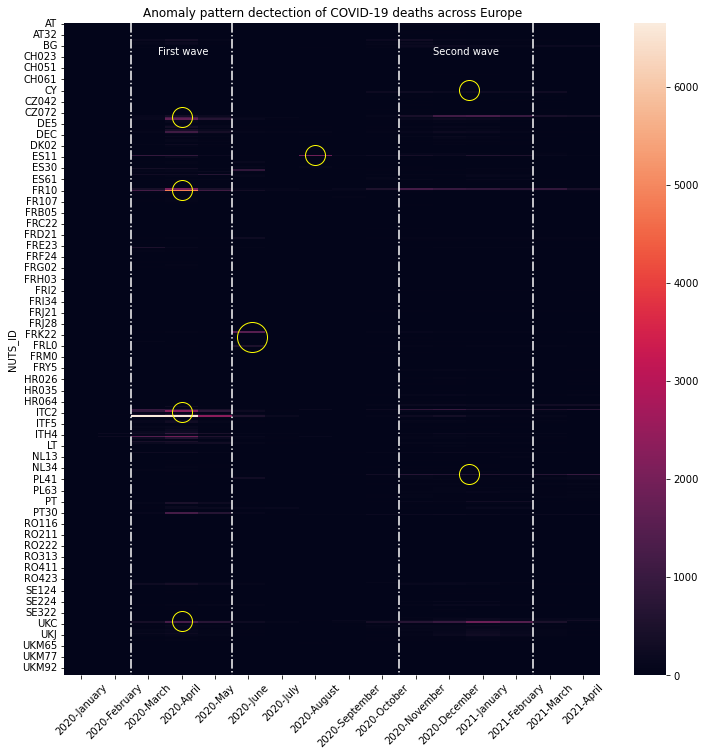

In [22]:
fig = plt.figure(figsize = (12,12))
sns.heatmap(normal_death)
plt.xticks(rotation = 45)

# light borders 


# Waves intervals 
plt.vlines(x = 2, ymin = 0, ymax = 700, color = 'w', linestyle = '-.')
plt.vlines(x = 5, ymin = 0, ymax = 700, color = 'w', linestyle = '-.')
plt.text(x = 2.8, y = 20, s = 'First wave', color = 'w', fontweight = 'light')

plt.vlines(x = 10, ymin = 0, ymax = 700, color = 'w', linestyle = '-.')
plt.vlines(x = 14, ymin = 0, ymax = 700, color = 'w', linestyle = '-.')
plt.text(x = 11, y = 20, s = 'Second wave', color = 'w', fontweight = 'light')

# first wave anomaly 
plt.plot(3.5, 59, 'o', ms=10 * 2, mec='yellow', mfc='none', mew=1)
plt.plot(3.5, 105, 'o', ms=10 * 2, mec='yellow', mfc='none', mew=1)
plt.plot(3.5, 245, 'o', ms=10 * 2, mec='yellow', mfc='none', mew=1)
plt.plot(3.5, 377, 'o', ms=10 * 2, mec='yellow', mfc='none', mew=1)

# second wave anomaly
plt.plot(12.1, 42, 'o', ms=10 * 2, mec='yellow', mfc='none', mew=1)
plt.plot(12.1, 284, 'o', ms=10 * 2, mec='yellow', mfc='none', mew=1)

# between anomaly 
plt.plot(7.5, 83, 'o', ms=10 * 2, mec='yellow', mfc='none', mew=1)
plt.plot(5.6, 198, 'o', ms=10 * 3, mec='yellow', mfc='none', mew=1)



plt.title('Anomaly pattern dectection of COVID-19 deaths across Europe', fontweight = 'light')
plt.show()

In [24]:
# select the region categories 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data = pd.DataFrame(scaler.fit_transform(normal_death), columns = normal_death.columns, index = normal_death.index)
data

,2020-January,2020-February,2020-March,2020-April,2020-May,2020-June,2020-July,2020-August,2020-September,2020-October,2020-November,2020-December,2021-January,2021-February,2021-March,2021-April
NUTS_ID,,,,,,,,,,,,,,,,
AT,-0.049386,-0.106167,-0.088275,-0.148915,-0.208528,-0.156426,-0.105937,-0.075588,-0.001822,0.665762,0.802219,0.747446,0.172977,0.076201,0.073543,-0.246800
AT11,-0.049386,-0.106167,-0.145222,-0.213408,-0.239897,-0.207818,-0.299161,-0.097291,-0.342169,-0.305352,-0.265515,-0.299172,-0.289950,-0.276980,-0.268383,-0.246800
AT12,-0.049386,-0.106167,-0.139527,-0.200509,-0.233623,-0.197539,-0.234753,-0.086440,-0.206030,-0.124679,-0.161851,-0.163833,-0.214060,-0.229253,-0.241029,-0.246800
AT13,-0.049386,-0.106167,-0.128138,-0.194060,-0.221076,-0.166704,-0.234753,-0.086440,-0.069891,-0.192431,-0.182584,-0.118720,-0.153349,-0.171981,-0.158966,-0.246800
AT21,-0.049386,-0.106167,-0.142375,-0.211258,-0.239897,-0.207818,-0.299161,-0.097291,-0.342169,-0.282768,-0.161851,-0.199923,-0.221649,-0.248344,-0.254706,-0.246800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UKM92,-0.049386,-0.106167,-0.142375,-0.209109,-0.233623,-0.207818,-0.299161,-0.097291,-0.274100,-0.305352,-0.338079,-0.344285,-0.267183,-0.267435,-0.309414,-0.246800
UKM93,-0.049386,-0.106167,-0.142375,-0.204809,-0.227350,-0.187261,-0.234753,-0.097291,-0.274100,-0.305352,-0.317347,-0.317217,-0.267183,-0.248344,-0.295737,-0.232609
UKM94,-0.049386,-0.106167,-0.142375,-0.206959,-0.233623,-0.197539,-0.299161,-0.097291,-0.342169,-0.350520,-0.306980,-0.326239,-0.289950,-0.267435,-0.309414,-0.232609


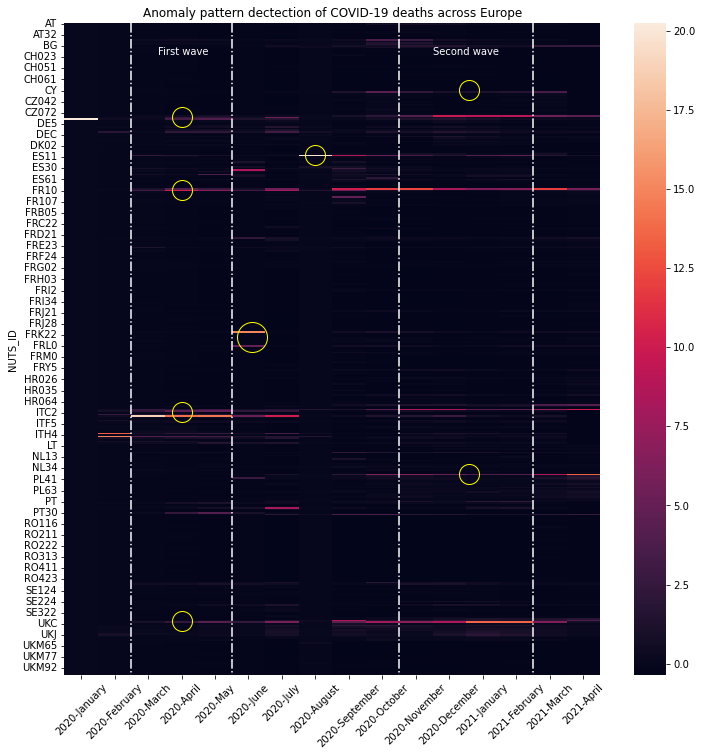

In [25]:
fig = plt.figure(figsize = (12,12))
sns.heatmap(data)
plt.xticks(rotation = 45)

# light borders 


# Waves intervals 
plt.vlines(x = 2, ymin = 0, ymax = 700, color = 'w', linestyle = '-.')
plt.vlines(x = 5, ymin = 0, ymax = 700, color = 'w', linestyle = '-.')
plt.text(x = 2.8, y = 20, s = 'First wave', color = 'w', fontweight = 'light')

plt.vlines(x = 10, ymin = 0, ymax = 700, color = 'w', linestyle = '-.')
plt.vlines(x = 14, ymin = 0, ymax = 700, color = 'w', linestyle = '-.')
plt.text(x = 11, y = 20, s = 'Second wave', color = 'w', fontweight = 'light')

# first wave anomaly 
plt.plot(3.5, 59, 'o', ms=10 * 2, mec='yellow', mfc='none', mew=1)
plt.plot(3.5, 105, 'o', ms=10 * 2, mec='yellow', mfc='none', mew=1)
plt.plot(3.5, 245, 'o', ms=10 * 2, mec='yellow', mfc='none', mew=1)
plt.plot(3.5, 377, 'o', ms=10 * 2, mec='yellow', mfc='none', mew=1)

# second wave anomaly
plt.plot(12.1, 42, 'o', ms=10 * 2, mec='yellow', mfc='none', mew=1)
plt.plot(12.1, 284, 'o', ms=10 * 2, mec='yellow', mfc='none', mew=1)

# between anomaly 
plt.plot(7.5, 83, 'o', ms=10 * 2, mec='yellow', mfc='none', mew=1)
plt.plot(5.6, 198, 'o', ms=10 * 3, mec='yellow', mfc='none', mew=1)



plt.title('Anomaly pattern dectection of COVID-19 deaths across Europe', fontweight = 'light')
plt.show()

In [26]:
# Create the three times (first wave, inbetween, and second weave)

first = normal_death.iloc[:,1:5].sum(axis=1)
middle = normal_death.iloc[:, 5:9].sum(axis=1)
second = normal_death.iloc[:, 9:-2].sum(axis=1)
datum = pd.concat([first, middle, second], axis =1)
datum.columns = ['First', 'Middle', 'Second']
datum

,First,Middle,Second
NUTS_ID,,,
AT,58.0,15,383
AT11,3.0,0,23
AT12,12.0,5,71
AT13,21.0,10,85
AT21,5.0,0,57
...,...,...,...
UKM92,7.0,1,15
UKM93,10.0,4,22
UKM94,8.0,1,15


<AxesSubplot:ylabel='NUTS_ID'>

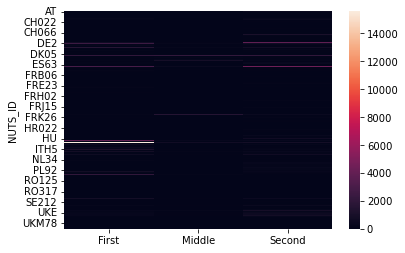

In [27]:
sns.heatmap(datum)

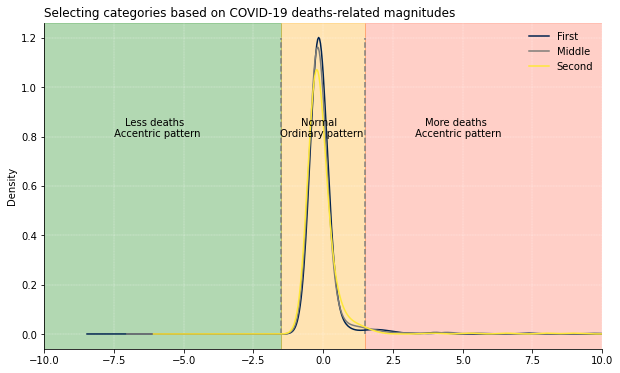

In [28]:
# Set boudnaries 

pd.DataFrame(scaler.fit_transform(datum), columns = datum.columns).plot.kde(figsize = (10, 6),
                                                                           cmap = 'cividis')
plt.xlim([-10, 10])
plt.vlines(x = -1.5, ymin = 0, ymax = 1.2, color = 'gray', linestyle = '--')
plt.vlines(x = 1.5, ymin = 0, ymax = 1.2, color = 'gray', linestyle = '--')

plt.axvspan(xmin = -10, xmax = -1.5, ymin = 0, ymax = 1, color = 'green', alpha = .3, zorder = 0)
plt.text(x = -6, y = 0.8, s = 'Less deaths \n Accentric pattern', ha = 'center')
plt.axvspan(xmin = -1.5, xmax = 1.5, ymin = 0, ymax = 1, color = 'orange', alpha = .3, zorder = 0)
plt.text(x = -0.1, y = 0.8, s = 'Normal \n Ordinary pattern', ha = 'center')
plt.axvspan(xmin = 1.5, xmax = 10, ymin = 0, ymax = 1, color = 'tomato', alpha = .3, zorder = 0)
plt.text(x = 4.8, y = 0.8, s = 'More deaths \n Accentric pattern', ha = 'center')

plt.title('Selecting categories based on COVID-19 deaths-related magnitudes',
          fontweight = 'light', loc = 'left')
plt.legend(frameon = False)
plt.grid(color='w', linestyle='--', linewidth=.3)
sns.despine()
plt.show()

<AxesSubplot:>

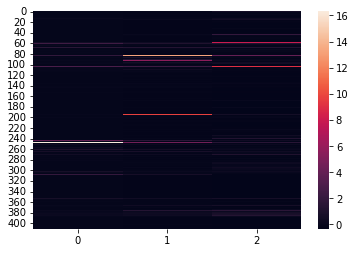

In [29]:
sns.heatmap(scaler.fit_transform(datum))

In [31]:
m = pd.DataFrame(scaler.fit_transform(datum), columns = datum.columns, index = datum.index)

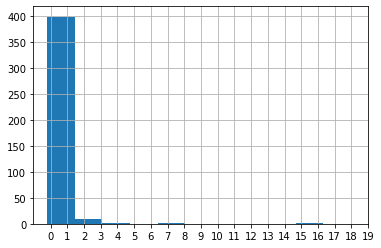

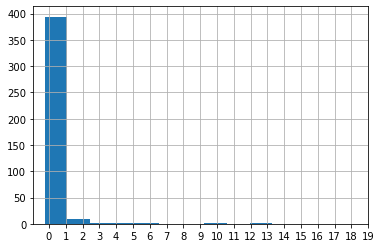

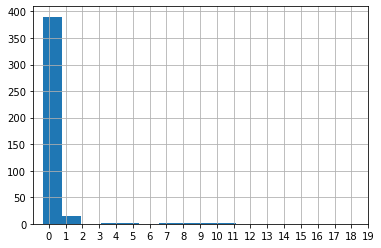

In [32]:
for col in m.columns:
    m [col].hist()
    plt.xticks([i for i in range(20)])
    plt.show()

In [33]:
def category(x):
    if x < 0:
        return 'Good'
    if x >= 0 and x <= 1.5:
        return 'Normal'
    if x > 1.5:
        return 'Bad'

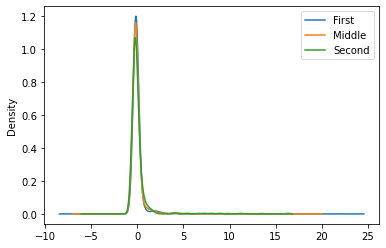

In [40]:
for col in m.columns:
    m[col].plot.kde(legend = True)

In [41]:
index = pd.Series(m.index)

In [42]:
m.query('Middle != "Good"')

,First,Middle,Second
NUTS_ID,,,
AT,-0.143280,-0.158595,0.475759
AT11,-0.201652,-0.258313,-0.301046
AT12,-0.192100,-0.225074,-0.197472
AT13,-0.182548,-0.191834,-0.167263
AT21,-0.199529,-0.258313,-0.227681
...,...,...,...
UKM92,-0.197406,-0.251665,-0.318309
UKM93,-0.194223,-0.231722,-0.303204
UKM94,-0.196345,-0.251665,-0.318309


In [43]:
shape = gpd.read_file('../Data/Second-Data/ESPON Narrow MapKit NUTS2016/nuts-version2016-level2.shp')
covid = gpd.read_file('../Data/First-Data/NUTS_COVID.shp')

### LEVEL 0

<AxesSubplot:>

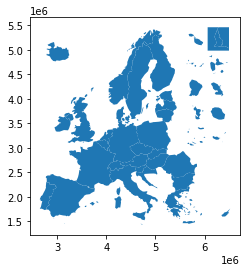

In [44]:
zero = gpd.read_file('../Data/Second-Data/ESPON Narrow MapKit NUTS2016/nuts-version2016-level0.shp')
zero.plot()

### LEVEL 1

<AxesSubplot:>

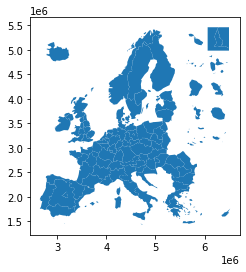

In [45]:
one = gpd.read_file('../Data/Second-Data/ESPON Narrow MapKit NUTS2016/nuts-version2016-level1.shp')
one.plot()

### LEVEL 2

<AxesSubplot:>

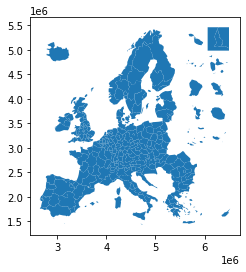

In [46]:
two = gpd.read_file('../Data/Second-Data/ESPON Narrow MapKit NUTS2016/nuts-version2016-level2.shp')
two.plot()

### LEVEL 3

<AxesSubplot:>

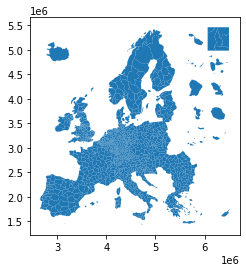

In [47]:
three = gpd.read_file('../Data/Second-Data/ESPON Narrow MapKit NUTS2016/nuts-version2016-level3.shp')
three.plot()

In [48]:
zero.shape

(32, 3)

# Analysis (ZERO level)

## Find the waves

In [49]:
# data 
datum = normal_death[normal_death.index.isin(zero.id)]

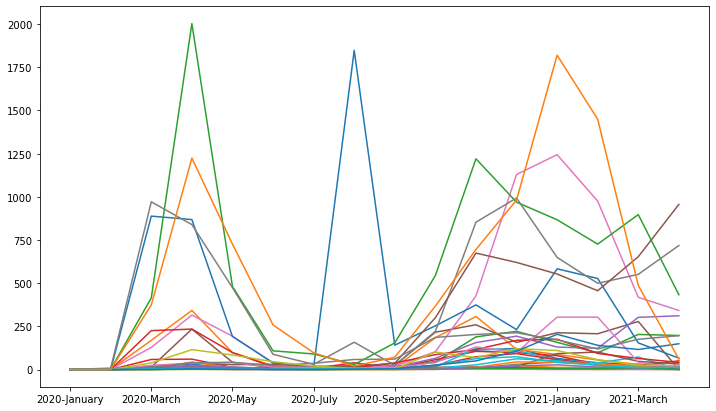

In [50]:
datum.T.plot(legend = False, figsize = (12,7));

Text(0.0, 1.0, 'European covid-19 deaths pattern detection')

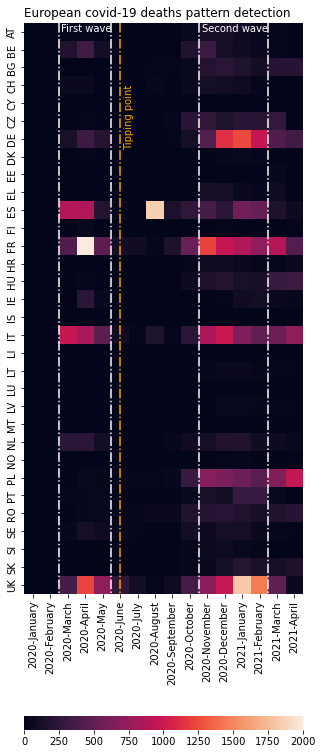

In [52]:
# grid_kws = {"height_ratios": (.9, .05), "hspace": .3}

fig = plt.figure(figsize = (5,15))
sns.heatmap(datum,  cbar_kws={"orientation": "horizontal"})

# Set the boundary 

plt.vlines(x = 5.5, ymin = 0, ymax = 700, color = 'orange', linestyle = '-.')
plt.text(x = 5.7, y = 7, s = 'Tipping point', color = 'orange', fontweight = 'light', rotation = 'vertical')

# Waves intervals 
plt.vlines(x = 2, ymin = 0, ymax = 700, color = 'w', linestyle = '-.')
plt.vlines(x = 5, ymin = 0, ymax = 700, color = 'w', linestyle = '-.')
plt.text(x = 2.1, y = 0.5, s = 'First wave', color = 'w', fontweight = 'light')

plt.vlines(x = 10, ymin = 0, ymax = 700, color = 'w', linestyle = '-.')
plt.vlines(x = 14, ymin = 0, ymax = 700, color = 'w', linestyle = '-.')
plt.text(x = 10.2, y = 0.5, s = 'Second wave', color = 'w', fontweight = 'light')
plt.ylabel('')
plt.title('European covid-19 deaths pattern detection', loc = 'left', fontweight = 'light')

## Make the analysis 

In [53]:
# Create the three times (first wave, inbetween, and second weave)

first = datum.iloc[:,1:5].sum(axis=1)
middle = datum.iloc[:, 5:9].sum(axis=1)
second = datum.iloc[:, 9:-2].sum(axis=1)
datum = pd.concat([first, middle, second], axis =1)
datum.columns = ['First', 'Middle', 'Second']
datum

,First,Middle,Second
NUTS_ID,,,
AT,58.0,15,383
BE,609.0,55,750
BG,16.0,65,706
CH,130.0,54,370
CY,6.0,3,21
CZ,35.0,38,1052
DE,636.0,82,3877
DK,50.0,14,116
EE,12.0,1,46


In [54]:
# select the region categories 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data = pd.DataFrame(scaler.fit_transform(datum), columns = datum.columns, index = datum.index)


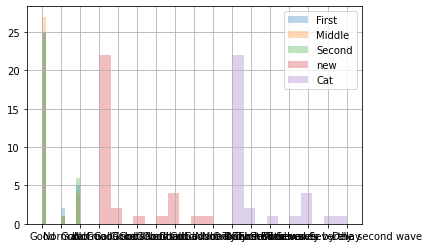

In [79]:
for col in data.columns:
    data[col].hist(alpha = .3, legend = True)

<AxesSubplot:ylabel='Density'>

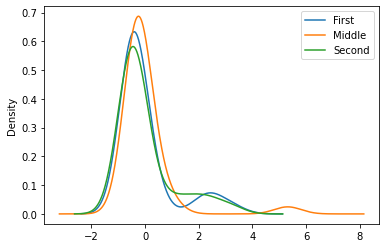

In [56]:
data.plot.kde()

In [57]:
def category(x):
    if x < 0: 
        return 'Good'
    if x > 0 and x < 0.3 : 
        return 'Normal'
    if x > 0.3:
        return 'bad' 

In [58]:
data['First'] = data['First'].apply(category)
data['Middle'] = data['Middle'].apply(category)
data['Second'] = data['Second'].apply(category)
data

,First,Middle,Second
NUTS_ID,,,
AT,Good,Good,Good
BE,Normal,Good,Good
BG,Good,Good,Good
CH,Good,Good,Good
CY,Good,Good,Good
CZ,Good,Good,Normal
DE,bad,Good,bad
DK,Good,Good,Good
EE,Good,Good,Good


The chosen **categories** are as follow: 

* **Not touched** (Good, Good, Good).
* **Touched** (Bad, Bad, Bad)
* **First wave** (Normal/bad, Good, Good)
* **Second wave** (Good, Good, Normal/Bad)
* **Delay** (Good, Bad/Normal, Good)


In [59]:
data['new'] = data['First'] + data['Middle'] +data['Second']

In [60]:
data

,First,Middle,Second,new
NUTS_ID,,,,
AT,Good,Good,Good,GoodGoodGood
BE,Normal,Good,Good,NormalGoodGood
BG,Good,Good,Good,GoodGoodGood
CH,Good,Good,Good,GoodGoodGood
CY,Good,Good,Good,GoodGoodGood
CZ,Good,Good,Normal,GoodGoodNormal
DE,bad,Good,bad,badGoodbad
DK,Good,Good,Good,GoodGoodGood
EE,Good,Good,Good,GoodGoodGood


In [61]:
def set_cat(x):
    if x == "GoodGoodGood":
        return 'Not Touched'
    if x == 'badGoodbad':
        return 'Both waves'
    if x == 'badbadbad':
        return 'Touched Severely'
    if x == 'GoodNormalGood':
        return 'Delay'
    if x == 'NormalGoodGood':
        return 'Only First Wave'
    if x == 'GoodGoodbad':
        return 'Touched Severely by the second wave'
    if x == 'GoodGoodNormal':
        return 'Only Second wave'

In [62]:
data.new.unique()

array(['GoodGoodGood', 'NormalGoodGood', 'GoodGoodNormal', 'badGoodbad',
       'badbadbad', 'GoodGoodbad', 'GoodNormalGood'], dtype=object)

In [63]:
data['Cat'] = data['new'].apply(set_cat)

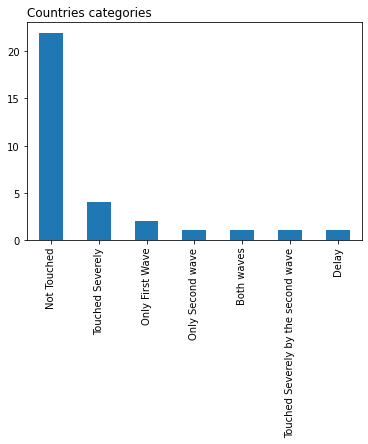

In [64]:
data.Cat.value_counts().plot(kind = 'bar')
plt.title('Countries categories', loc = 'left');

<AxesSubplot:>

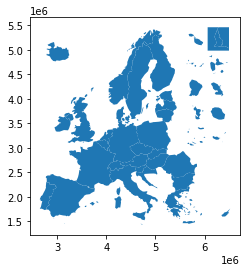

In [65]:
zero = gpd.read_file('../Data/Second-Data/ESPON Narrow MapKit NUTS2016/nuts-version2016-level0.shp')
zero.plot()

In [66]:
cat = pd.merge(data, zero, left_on = data.index, right_on = 'id')

In [67]:
cat = gpd.GeoDataFrame(cat)

In [68]:
cat.query('Cat == "Delay"')

,First,Middle,Second,new,Cat,id,name,geometry
27,Good,Normal,Good,GoodNormalGood,Delay,RO,ROMÂNIA,"POLYGON ((5616333.448 2870153.095, 5651597.505..."


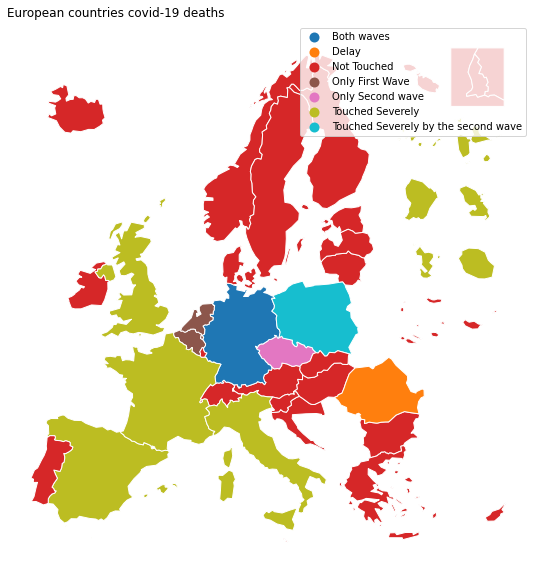

In [75]:
fig, ax = plt.subplots(figsize = (12,10))
cat.plot(column = 'Cat', legend = True, figsize = (12,8), ax =ax, cmap = 'tab10', categorical = True, edgecolor = 'white')
plt.title(f'European countries covid-19 deaths', loc = 'left')
plt.axis('off')
plt.show()

## Make the Maps

In [222]:
three.shape

(1396, 3)

In [224]:
225/1396

0.16117478510028654

In [223]:
normal_death[normal_death.index.isin(three.id)].shape

(225, 16)

In [51]:
n.shape

(2004, 39)

In [56]:
shape.id

0      AT11
1      AT12
2      AT13
3      AT21
4      AT22
       ... 
293    UKM8
294    UKM8
295    LT01
296    PL91
297    HU11
Name: id, Length: 298, dtype: object

In [58]:
shape

,id,name,geometry
0,AT11,Burgenland,"POLYGON ((4855527.344 2793852.442, 4854877.854..."
1,AT12,Niederösterreich,"POLYGON ((4759634.074 2866690.720, 4771301.834..."
2,AT13,Wien,"POLYGON ((4810963.665 2804214.239, 4804030.194..."
3,AT21,Kärnten,"POLYGON ((4695557.961 2663488.691, 4709536.419..."
4,AT22,Steiermark,"POLYGON ((4723101.762 2755649.249, 4761707.764..."
...,...,...,...
293,UKM8,West Central Scotland,None
294,UKM8,West Central Scotland,"POLYGON ((3422075.024 3786165.488, 3432682.199..."
295,LT01,Sostinės regionas,"POLYGON ((5328543.236 3613884.929, 5321388.306..."
296,PL91,Warszawski stołeczny,"POLYGON ((5060180.192 3330632.450, 5074586.790..."


In [66]:
normal_death[normal_death.index.isin(shape.id)]

,2020-January,2020-February,2020-March,2020-April,2020-May,2020-June,2020-July,2020-August,2020-September,2020-October,2020-November,2020-December,2021-January,2021-February,2021-March,2021-April
NUTS_ID,,,,,,,,,,,,,,,,
AT11,0.0,0.0,1,1,1,0,0,0,0,3,9,6,3,2,4,0.0
AT12,0.0,0.0,3,7,2,1,1,1,2,11,19,21,13,7,6,0.0
AT13,0.0,0.0,7,10,4,4,1,1,4,8,17,26,21,13,12,0.0
AT21,0.0,0.0,2,2,1,0,0,0,0,4,19,17,12,5,5,0.0
AT22,0.0,0.0,7,7,2,1,1,1,3,11,33,32,13,10,10,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PT17,0.0,1.0,34,164,158,116,131,5,10,13,33,40,153,149,25,0.0
PT18,0.0,0.0,0,1,0,6,14,1,1,5,6,9,30,25,5,0.0
PT20,0.0,0.0,0,12,3,0,0,0,0,0,2,1,1,1,0,0.0


In [68]:
datum

,First,Middle,Second
NUTS_ID,,,
AT,58.0,15,383
AT11,3.0,0,23
AT12,12.0,5,71
AT13,21.0,10,85
AT21,5.0,0,57
...,...,...,...
UKM92,7.0,1,15
UKM93,10.0,4,22
UKM94,8.0,1,15


In [75]:
regions.geo

0        AT
1       AT1
2      AT11
3      AT12
4      AT13
       ... 
147     SK0
148    SK01
149    SK02
150    SK03
151    SK04
Name: geo, Length: 152, dtype: object

<AxesSubplot:>

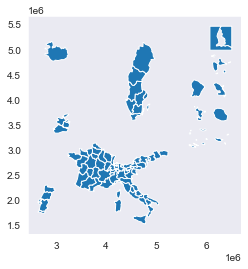

In [76]:
bol = shape.id.isin(regions.geo)
shape[bol].plot()

In [85]:
deaths = pd.read_csv('../Output/deaths.csv')

In [86]:
deaths.GEO

0          BE
1         BE1
2        BE10
3       BE100
4         BE2
        ...  
1439    RS225
1440    RS226
1441    RS227
1442    RS228
1443    RS229
Name: GEO, Length: 1444, dtype: object

In [99]:
reg_death = normal_death[normal_death.index.isin(shape.id)]

In [105]:
reg_death.head()

,2020-January,2020-February,2020-March,2020-April,2020-May,2020-June,2020-July,2020-August,2020-September,2020-October,2020-November,2020-December,2021-January,2021-February,2021-March,2021-April
NUTS_ID,,,,,,,,,,,,,,,,
AT11,0.0,0.0,1,1,1,0,0,0,0,3,9,6,3,2,4,0.0
AT12,0.0,0.0,3,7,2,1,1,1,2,11,19,21,13,7,6,0.0
AT13,0.0,0.0,7,10,4,4,1,1,4,8,17,26,21,13,12,0.0
AT21,0.0,0.0,2,2,1,0,0,0,0,4,19,17,12,5,5,0.0
AT22,0.0,0.0,7,7,2,1,1,1,3,11,33,32,13,10,10,0.0


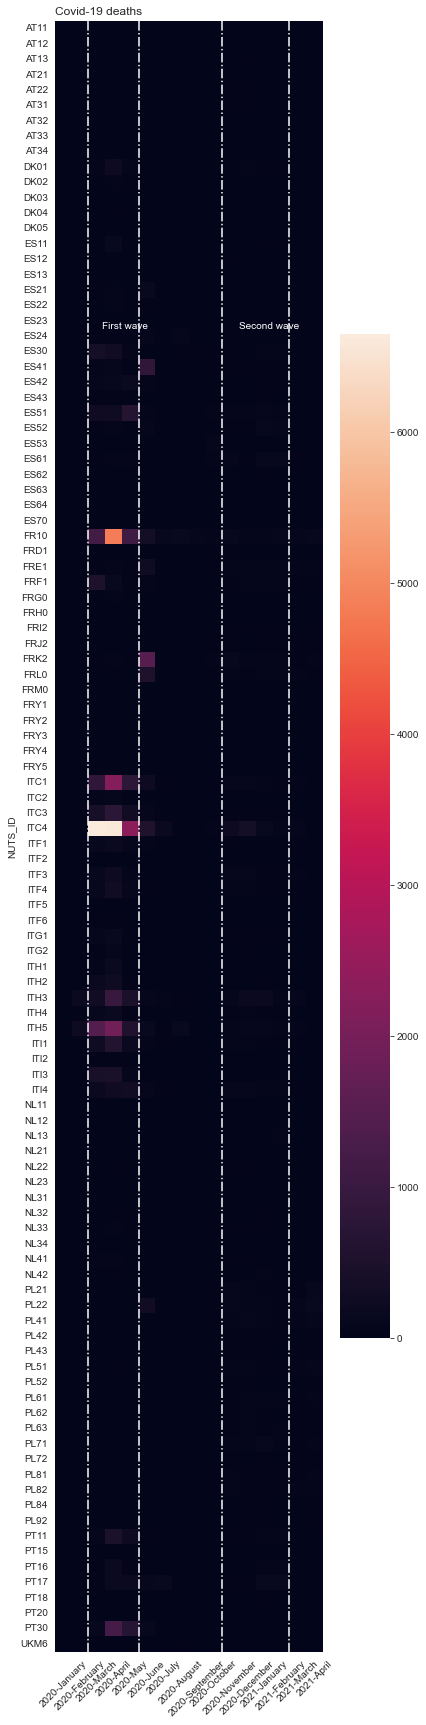

In [114]:
fig = plt.figure(figsize = (6,30))
sns.heatmap(normal_death[normal_death.index.isin(shape.id)])
plt.xticks(rotation = 45)
# light borders 


# Waves intervals 
plt.vlines(x = 2, ymin = 0, ymax = 700, color = 'w', linestyle = '-.')
plt.vlines(x = 5, ymin = 0, ymax = 700, color = 'w', linestyle = '-.')
plt.text(x = 2.8, y = 20, s = 'First wave', color = 'w', fontweight = 'light')

plt.vlines(x = 10, ymin = 0, ymax = 700, color = 'w', linestyle = '-.')
plt.vlines(x = 14, ymin = 0, ymax = 700, color = 'w', linestyle = '-.')
plt.text(x = 11, y = 20, s = 'Second wave', color = 'w', fontweight = 'light')

plt.title('Covid-19 deaths', loc = 'left', fontweight = 'light');

0        AT
1       AT1
2      AT11
3      AT12
4      AT13
       ... 
147     SK0
148    SK01
149    SK02
150    SK03
151    SK04
Name: geo, Length: 152, dtype: object

In [109]:
shape.shape

(298, 3)

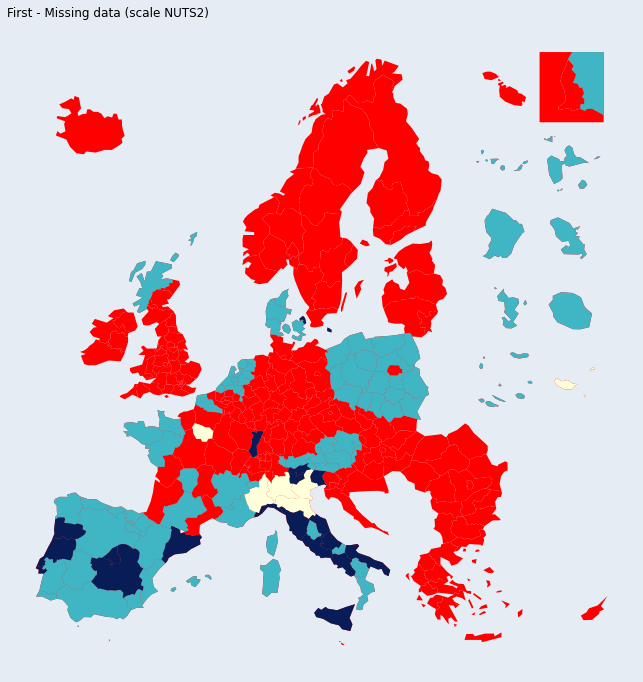

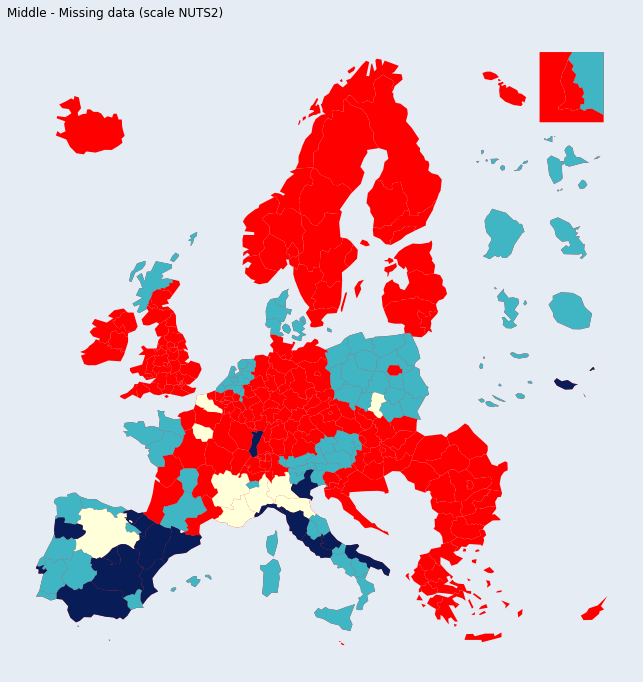

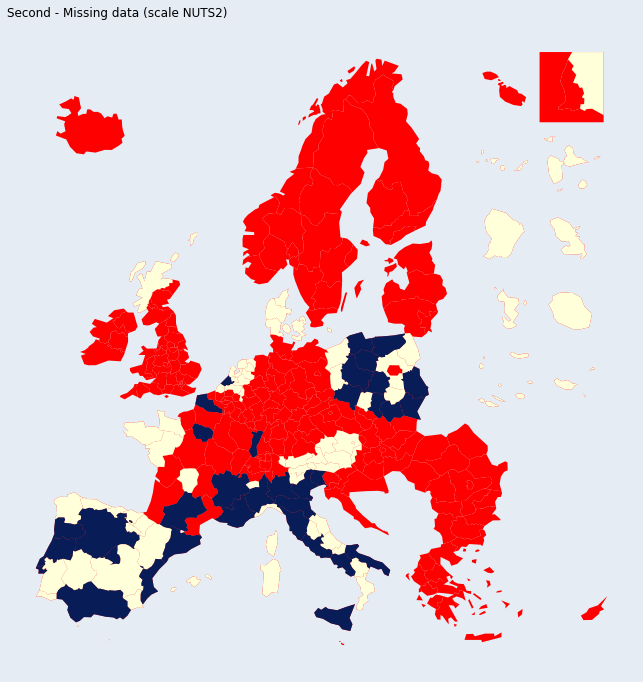

In [187]:
plt.rcParams['figure.facecolor'] = '#E5ECF4'
for col in ['First', 'Middle', 'Second']:
    fig, ax = plt.subplots(figsize = (12,10))
    one = shape.plot(color = 'red', ax =ax, label = 'Missing Data')
    two = pd.merge(shape, s, left_on = 'id', right_on = 'NUTS_ID').plot(cmap = 'YlGnBu',
        column = col, ax =ax, categorical = True)
    plt.title(f'{col} - Missing data (scale NUTS2)', fontweight = 'light', loc = 'left')
    plt.tight_layout()
    plt.axis('off')
    plt.show()

In [119]:
d = pd.read_csv('../Output/D.csv')

In [128]:
shape[shape.id.isin(d.NUTS_ID)]

,id,name,geometry
0,AT11,Burgenland,"POLYGON ((4855527.344 2793852.442, 4854877.854..."
1,AT12,Niederösterreich,"POLYGON ((4759634.074 2866690.720, 4771301.834..."
2,AT13,Wien,"POLYGON ((4810963.665 2804214.239, 4804030.194..."
3,AT21,Kärnten,"POLYGON ((4695557.961 2663488.691, 4709536.419..."
4,AT22,Steiermark,"POLYGON ((4723101.762 2755649.249, 4761707.764..."
...,...,...,...
224,PT15,Algarve,"POLYGON ((2703370.694 1789766.815, 2710143.756..."
225,PT16,Centro (PT),"POLYGON ((2771782.073 2176755.839, 2774665.239..."
226,PT17,Área Metropolitana de Lisboa,"POLYGON ((2699581.481 1970758.752, 2699184.662..."
227,PT18,Alentejo,"POLYGON ((2725838.655 2013527.081, 2742771.355..."


In [129]:
o = gpd.read_file('../Data/First-Data/NUTS_COVID.shp')

<AxesSubplot:>

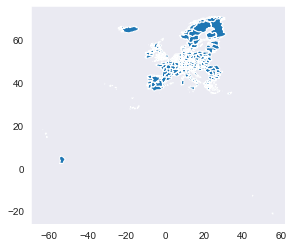

In [145]:
o[o.NUTS_ID.isin(shape.id)].plot()

In [153]:
o.columns

Index(['NUTS_ID', 'LEVL_CODE', 'CNTR_CODE', 'NUTS_NAME', '3', '4', '5', '6',
       '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18',
       '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30',
       '31', '32', '33', '34', '35', '36', 'geometry'],
      dtype='object')

In [158]:
o.query('LEVL_CODE == 2')

,NUTS_ID,LEVL_CODE,CNTR_CODE,NUTS_NAME,3,4,5,6,7,8,...,28,29,30,31,32,33,34,35,36,geometry
1301,BG41,2,BG,Ð®Ð³Ð¾Ð·Ð°Ð¿Ð°Ð´ÐµÐ½,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((23.41277 43.16052, 23.45265 43.15147..."
1302,BG42,2,BG,Ð®Ð¶ÐµÐ½ ÑÐµÐ½ÑÑÐ°Ð»ÐµÐ½,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((25.00720 42.73762, 25.01641 42.55024..."
1303,CH01,2,CH,RÃ©gion lÃ©manique,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((6.86623 46.90929, 6.89621 46.9..."
1369,AT32,2,AT,Salzburg,0.0,0.0,0.0,0.0,0.0,0.0,...,37.0,37.0,37.0,37.0,37.0,37.0,37.0,37.0,37.0,"MULTIPOLYGON (((13.30382 48.00782, 13.33794 47..."
1370,AT33,2,AT,Tirol,0.0,0.0,0.0,0.0,0.0,0.0,...,101.0,101.0,101.0,101.0,101.0,101.0,101.0,101.0,101.0,"MULTIPOLYGON (((12.33805 47.69709, 12.42904 47..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1952,HR06,2,HR,Sjeverna Hrvatska,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((17.29433 45.98854, 17.20205 45.97788..."
1958,NO02,2,NO,Innlandet,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((12.25466 62.33102, 12.29937 62.26749..."
1959,NO06,2,NO,TrÃ¸ndelag,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((11.97605 65.07260, 12.04611 65..."
1960,NO08,2,NO,Oslo og Viken,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((11.83973 59.84077, 11.92697 59.79048..."


In [159]:
covid

,NUTS_ID,LEVL_CODE,CNTR_CODE,NUTS_NAME,3,4,5,6,7,8,...,28,29,30,31,32,33,34,35,36,geometry
0,BG423,3,BG,ÐÐ°Ð·Ð°ÑÐ´Ð¶Ð¸Ðº,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((24.42101 42.55306, 24.41032 42.46950..."
1,BG424,3,BG,Ð¡Ð¼Ð¾Ð»ÑÐ½,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((25.07422 41.79348, 25.05851 41.75177..."
2,BG425,3,BG,ÐÑÑÐ´Ð¶Ð°Ð»Ð¸,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((25.94863 41.32034, 25.90644 41.30757..."
3,CH011,3,CH,Vaud,0.0,0.0,0.0,0.0,0.0,0.0,...,424.0,424.0,424.0,424.0,425.0,425.0,427.0,429.0,429.0,"MULTIPOLYGON (((6.86623 46.90929, 6.89621 46.9..."
4,CH012,3,CH,Valais,0.0,0.0,0.0,0.0,0.0,0.0,...,153.0,153.0,153.0,153.0,153.0,153.0,154.0,154.0,154.0,"POLYGON ((8.47767 46.52760, 8.39953 46.48872, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999,RS,0,RS,Srbija/Ð¡pÐ±Ð¸ÑÐ°,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((19.69810 46.18793, 19.79780 46.13588..."
2000,CZ,0,CZ,Äesko,0.0,0.0,0.0,0.0,0.0,0.0,...,352.0,352.0,358.0,368.0,382.0,389.0,394.0,411.0,419.0,"POLYGON ((14.31787 51.05470, 14.41509 51.02507..."
2001,EE,0,EE,Eesti,0.0,0.0,0.0,0.0,0.0,0.0,...,63.0,63.0,63.0,63.0,63.0,63.0,63.0,63.0,64.0,"MULTIPOLYGON (((25.83016 59.56406, 25.88224 59..."
2002,HU,0,HU,MagyarorszÃ¡g,0.0,0.0,0.0,0.0,0.0,0.0,...,588.0,593.0,595.0,596.0,596.0,602.0,607.0,611.0,614.0,"POLYGON ((22.12108 48.37831, 22.15531 48.40340..."
